#### High-level "Notebook API"

In [1]:
import sys 
import os 
sys.path.insert(0, '..')


# from biosimulator_processes.api.instance import 

In [2]:
from biosimulator_processes.io import read_report_outputs
from biosimulator_processes import CORE
from biosimulator_processes.helpers import plot_utc_outputs, plot_ode_output_data

Smoldyn is not properly installed in this environment and thus its process implementation cannot be registered. Please consult smoldyn documentation.
Available processes:
[ 'console-emitter',
  'ram-emitter',
  'composite',
  'cobra-process',
  'copasi-process',
  'tellurium-process',
  'utc-amici',
  'utc-copasi',
  'utc-tellurium',
  'copasi-step',
  'tellurium-step',
  'amici-step',
  'plotter',
  'plotter2d',
  'utc-comparator']


In [3]:
from biosimulator_processes.processes.amici_process import UtcAmici
from biosimulator_processes.processes.copasi_process import UtcCopasi
from biosimulator_processes.processes.tellurium_process import UtcTellurium

In [4]:
omex_dir = '../test_suite/examples/sbml-core/Elowitz-Nature-2000-Repressilator'
omex_fp = omex_dir + '.omex'
sbml_fp = os.path.join(omex_dir, 'BIOMD0000000012_url.xml')
sedml_fp = os.path.join(omex_dir, 'simulation.sedml')
reports_path = os.path.join(omex_dir, 'reports.h5')
selected_species = 'cI mRNA'

In [5]:
utc_tellurium = UtcTellurium(config={'model': {'model_source': omex_dir + '.omex'}})
tellurium_results = utc_tellurium.update()

In [6]:
utc_copasi = UtcCopasi(config={'model': {'model_source': omex_dir + '.omex'}})
copasi_results = utc_copasi.update()

In [7]:
copasi_results['floating_species'][selected_species][:3], copasi_results['floating_species'][selected_species][-1]

(array([32.52364564, 32.2999656 , 31.77048065]), 4.915315086815449)

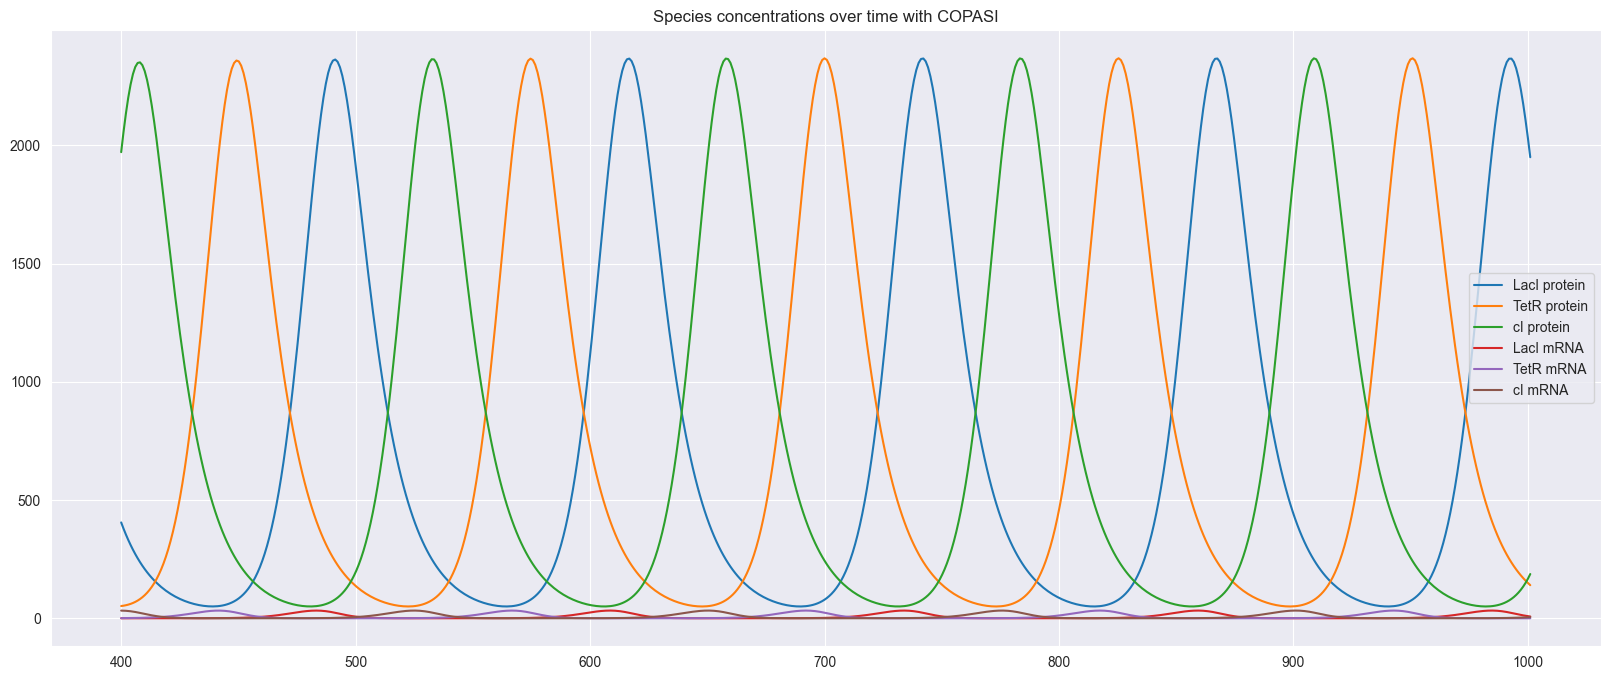

In [8]:
utc_copasi.plot_results()

In [9]:
utc_amici = UtcAmici(config={'model': {'model_source': omex_dir + '.omex'}})
amici_results = utc_amici.update()

2024-06-10 12:14:14.305 - amici.sbml_import - INFO - Finished importing SBML                         (3.97E-02s)
2024-06-10 12:14:14.417 - amici.sbml_import - INFO - Finished processing SBML observables            (1.09E-01s)
2024-06-10 12:14:14.421 - amici.sbml_import - INFO - Finished processing SBML event observables      (3.75E-07s)
2024-06-10 12:14:14.443 - amici.de_model - INFO - Finished computing xdot                            (2.97E-03s)
2024-06-10 12:14:14.449 - amici.de_model - INFO - Finished computing x0                              (3.10E-03s)
2024-06-10 12:14:14.468 - amici.de_model - INFO - Finished computing w                               (1.54E-02s)
2024-06-10 12:14:15.108 - amici.de_export - INFO - Finished generating cpp code                      (6.34E-01s)
2024-06-10 12:14:23.719 - amici.de_export - INFO - Finished compiling cpp code                       (8.61E+00s)


In [10]:
tellurium_results['floating_species'][selected_species][:600][-1], tellurium_results['floating_species'][selected_species].shape

(3.866501291206603, (601,))

In [11]:
amici_results['floating_species'][selected_species][:600][-1], amici_results['floating_species'][selected_species].shape

(3.866629952326904, (601,))

In [12]:
copasi_results['floating_species'][selected_species].shape

(600,)

In [13]:
from biosimulator_processes.api.compare import generate_comparison
import numpy as np 
import seaborn as sns

outputs = [
    amici_results['floating_species'][selected_species][:600], 
    copasi_results['floating_species'][selected_species],
    tellurium_results['floating_species'][selected_species][:600],
]
comparison = generate_comparison(
    outputs=outputs,
    simulators=['amici', 'copasi', 'tellurium'],
    method='prox'
)

In [14]:
comparison.data

,amici,copasi,tellurium
amici,True,False,True
copasi,False,True,False
tellurium,True,False,True


Text(0.5, 1.0, 'cI mRNA')

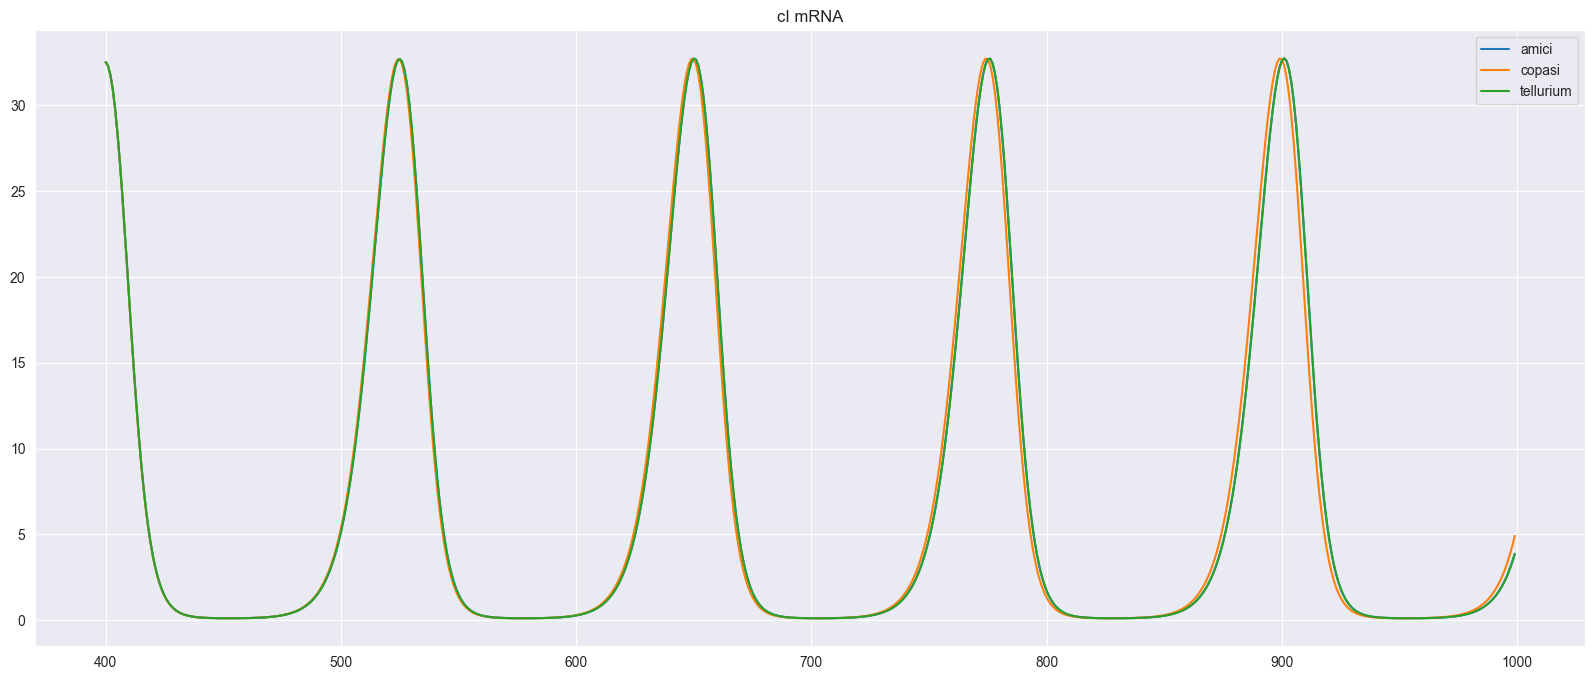

In [15]:
d = dict(zip(
    ['amici', 'copasi', 'tellurium'],
    outputs
))

import matplotlib.pyplot as plt 

plt.figure(figsize=(20, 8))
for sim, output in d.items():
    sns.lineplot(x=amici_results['time'][:600], y=output, label=sim)
plt.title(selected_species)

In [16]:
comparison.data

,amici,copasi,tellurium
amici,True,False,True
copasi,False,True,False
tellurium,True,False,True


In [17]:
# TODO: run composite here

In [18]:
from process_bigraph import Composite


utc_comparison_doc = {
    'utc_tellurium': {
        '_type': 'step',
        'address': 'local:utc-tellurium',
        'config': {
            'model': {
                'model_source': omex_dir + '.omex'
            }
        },
        'inputs': {
            'time': ['time_store'],
            'floating_species': ['floating_species_store'],
            'model_parameters': ['model_parameters_store'],
            'reactions': ['reactions_store']
        },
        'outputs': {
            'time': ['time_store'],
            'floating_species': ['floating_species_store'],
        }
    }
}

In [19]:
wf = Composite(
    config={
        'state': utc_comparison_doc,
        'bridge': {
            'time': ['time_store'],
            'floating_species': ['floating_species_store']
        }
    },
    core=CORE
)

In [20]:
wf.run(1)

Exception: trying to apply an update to an existing list, but the update is not a list or of element type:
  update: [ 400.  401.  402.  403.  404.  405.  406.  407.  408.  409.  410.  411.
  412.  413.  414.  415.  416.  417.  418.  419.  420.  421.  422.  423.
  424.  425.  426.  427.  428.  429.  430.  431.  432.  433.  434.  435.
  436.  437.  438.  439.  440.  441.  442.  443.  444.  445.  446.  447.
  448.  449.  450.  451.  452.  453.  454.  455.  456.  457.  458.  459.
  460.  461.  462.  463.  464.  465.  466.  467.  468.  469.  470.  471.
  472.  473.  474.  475.  476.  477.  478.  479.  480.  481.  482.  483.
  484.  485.  486.  487.  488.  489.  490.  491.  492.  493.  494.  495.
  496.  497.  498.  499.  500.  501.  502.  503.  504.  505.  506.  507.
  508.  509.  510.  511.  512.  513.  514.  515.  516.  517.  518.  519.
  520.  521.  522.  523.  524.  525.  526.  527.  528.  529.  530.  531.
  532.  533.  534.  535.  536.  537.  538.  539.  540.  541.  542.  543.
  544.  545.  546.  547.  548.  549.  550.  551.  552.  553.  554.  555.
  556.  557.  558.  559.  560.  561.  562.  563.  564.  565.  566.  567.
  568.  569.  570.  571.  572.  573.  574.  575.  576.  577.  578.  579.
  580.  581.  582.  583.  584.  585.  586.  587.  588.  589.  590.  591.
  592.  593.  594.  595.  596.  597.  598.  599.  600.  601.  602.  603.
  604.  605.  606.  607.  608.  609.  610.  611.  612.  613.  614.  615.
  616.  617.  618.  619.  620.  621.  622.  623.  624.  625.  626.  627.
  628.  629.  630.  631.  632.  633.  634.  635.  636.  637.  638.  639.
  640.  641.  642.  643.  644.  645.  646.  647.  648.  649.  650.  651.
  652.  653.  654.  655.  656.  657.  658.  659.  660.  661.  662.  663.
  664.  665.  666.  667.  668.  669.  670.  671.  672.  673.  674.  675.
  676.  677.  678.  679.  680.  681.  682.  683.  684.  685.  686.  687.
  688.  689.  690.  691.  692.  693.  694.  695.  696.  697.  698.  699.
  700.  701.  702.  703.  704.  705.  706.  707.  708.  709.  710.  711.
  712.  713.  714.  715.  716.  717.  718.  719.  720.  721.  722.  723.
  724.  725.  726.  727.  728.  729.  730.  731.  732.  733.  734.  735.
  736.  737.  738.  739.  740.  741.  742.  743.  744.  745.  746.  747.
  748.  749.  750.  751.  752.  753.  754.  755.  756.  757.  758.  759.
  760.  761.  762.  763.  764.  765.  766.  767.  768.  769.  770.  771.
  772.  773.  774.  775.  776.  777.  778.  779.  780.  781.  782.  783.
  784.  785.  786.  787.  788.  789.  790.  791.  792.  793.  794.  795.
  796.  797.  798.  799.  800.  801.  802.  803.  804.  805.  806.  807.
  808.  809.  810.  811.  812.  813.  814.  815.  816.  817.  818.  819.
  820.  821.  822.  823.  824.  825.  826.  827.  828.  829.  830.  831.
  832.  833.  834.  835.  836.  837.  838.  839.  840.  841.  842.  843.
  844.  845.  846.  847.  848.  849.  850.  851.  852.  853.  854.  855.
  856.  857.  858.  859.  860.  861.  862.  863.  864.  865.  866.  867.
  868.  869.  870.  871.  872.  873.  874.  875.  876.  877.  878.  879.
  880.  881.  882.  883.  884.  885.  886.  887.  888.  889.  890.  891.
  892.  893.  894.  895.  896.  897.  898.  899.  900.  901.  902.  903.
  904.  905.  906.  907.  908.  909.  910.  911.  912.  913.  914.  915.
  916.  917.  918.  919.  920.  921.  922.  923.  924.  925.  926.  927.
  928.  929.  930.  931.  932.  933.  934.  935.  936.  937.  938.  939.
  940.  941.  942.  943.  944.  945.  946.  947.  948.  949.  950.  951.
  952.  953.  954.  955.  956.  957.  958.  959.  960.  961.  962.  963.
  964.  965.  966.  967.  968.  969.  970.  971.  972.  973.  974.  975.
  976.  977.  978.  979.  980.  981.  982.  983.  984.  985.  986.  987.
  988.  989.  990.  991.  992.  993.  994.  995.  996.  997.  998.  999.
 1000.]
  element type: {'_apply': 'accumulate',
 '_check': 'check_float',
 '_dataclass': 'dataclass_float',
 '_default': '0.0',
 '_description': '64-bit floating point precision number',
 '_deserialize': 'deserialize_float',
 '_divide': 'divide_float',
 '_inherit': ['number'],
 '_serialize': 'to_string',
 '_type': 'float'}

In [ ]:
utc_tellurium.inputs()

In [21]:
from biosimulator_processes.execute import exec_utc_comparison

In [22]:
comparison = exec_utc_comparison(omex_fp=omex_fp, simulators=['amici', 'copasi', 'tellurium'], comparison_id='repressilator-comparison')

2024-06-10 12:14:31.374 - amici.sbml_import - INFO - Finished loading SBML                           (6.38E-03s)
2024-06-10 12:14:31.412 - amici.sbml_import - INFO - Finished importing SBML                         (3.49E-02s)
2024-06-10 12:14:31.427 - amici.sbml_import - INFO - Finished processing SBML observables            (1.18E-02s)
2024-06-10 12:14:31.430 - amici.sbml_import - INFO - Finished processing SBML event observables      (5.42E-07s)
2024-06-10 12:14:31.449 - amici.de_model - INFO - Finished computing xdot                            (2.74E-03s)
2024-06-10 12:14:31.455 - amici.de_model - INFO - Finished computing x0                              (3.09E-03s)
2024-06-10 12:14:31.465 - amici.de_model - INFO - Finished computing w                               (6.72E-03s)
2024-06-10 12:14:32.037 - amici.de_export - INFO - Finished generating cpp code                      (5.68E-01s)
2024-06-10 12:14:39.464 - amici.de_export - INFO - Finished compiling cpp code                  

In [23]:
comparison

{'results': {'LacI protein': {'mse': {'amici': {'amici': 0.0,
     'copasi': 3421.101751414077,
     'tellurium': 1112642.3515076651},
    'copasi': {'amici': 3421.101751414077,
     'copasi': 0.0,
     'tellurium': 1122517.493697266},
    'tellurium': {'amici': 1112642.3515076651,
     'copasi': 1122517.493697266,
     'tellurium': 0.0}},
   'prox': {'amici': {'amici': True, 'copasi': False, 'tellurium': False},
    'copasi': {'amici': False, 'copasi': True, 'tellurium': False},
    'tellurium': {'amici': False, 'copasi': False, 'tellurium': True}},
   'output_data': {'amici_floating_species': {'LacI protein': array([ 405.55753256,  379.34708072,  354.8478953 ,  331.95373404,
             310.56397686,  290.58356407,  271.92287635,  254.49757366,
             238.22840706,  223.04101293,  208.86569745,  195.63721763,
             183.29456321,  171.78074394,  161.04258286,  151.03052068,
             141.69842885,  133.00343657,  124.90576937,  117.36860142,
             110.35792164,